# OSTN-03-04 Processing Time Analysis
- draw processting time vs block height
- save graphs as html and png format

In [1]:
import json
import pandas as pd
import os
import shutil
import re
import plotly.express as px 
import numpy as np

In [2]:
def read_data(files, path):
    data = []
    for file in files:
        if "zerolog" in file:
            with open(path + file, errors='ignore') as f:
                for line in f.readlines():
                    if "PROPOSING NEW BLOCK" in line or "Successfully Proposed New Block" in line:
                        data.append(json.loads(line))
    return data

In [3]:
def data_processing(data):
    df = pd.DataFrame(data, columns = ['blockNum', 'time', 'message'])
    df["message"] = df["message"].apply(lambda c: c.replace("-","").replace("=","").strip())
    pattern = re.compile('(.*?)\..*?')
    df['time'] = df['time'].apply(lambda c: re.findall(pattern, c)[0].replace("T"," "))
    df['time'] = pd.to_datetime(df['time'])
    df.sort_values(by=['time','message'], inplace = True)
    df.reset_index(inplace = True, drop = True)
    return df

In [4]:
def get_block_change_index(df):
    df['block_diff'] = (df['blockNum']-df['blockNum'].shift()).fillna(0).astype(int)
    index = df[df['block_diff'] < 0].index.tolist()
    index.insert(0,0)
    index.append(len(df))
    return index

In [5]:
def draw_graph(df, index):  
    
    html_path = "https://harmony-one.github.io/harmony-log-analysis/" + html_dir.replace("../../docs/", "")\
    + str(index) + "_processing_time_vs_block_height.html"
    png_path = fig_dir
    print("png graphs saved in " + png_path)
    print('html graphs saved in ' + html_path)

    if not os.path.exists(html_dir):
        os.makedirs(html_dir)
        
    if not os.path.exists(png_path):
        os.makedirs(png_path)
        
    colors = ["#00AEE9"]
    fig = px.line(df[df['message'] == 'Successfully Proposed New Block'], \
                  x="blockNum", y="time_diff", color='message', color_discrete_sequence=colors,
                  title = 'Processing Time vs Block Height')
    for i in df.index.tolist():
        if (i+1) % 525 == 0:
            fig.add_shape(type="line", x0=df.iloc[i]["blockNum"], y0=0,x1=df.iloc[i]["blockNum"],y1=1,
                    line=dict(
                    width=0.5,
                    dash="dot",
                ))
    fig.update_shapes(dict(xref='x', yref='paper'))
    
    fig.show(renderer="svg",width=900, height=500)
    fig.write_html(html_dir + str(index) + "_processing_time_vs_block_height.html")
    fig.write_image(png_path + str(index) + "_processing_time_vs_block_height.png",width=900, height=500)

In [6]:
log_dir = "../../logs/node_logs/OSTN_03_04/s0-leader/"
fig_dir = "../../graphs/processing_time/OSTN_03_04/block_height/"
html_dir = "../../docs/graphs/processing_time/OSTN_03_04/block_height/"
files = os.listdir(log_dir)
data = read_data(files, log_dir)
df = data_processing(data)
index = get_block_change_index(df)

## draw processing time vs block height

Block 1
png graphs saved in ../../graphs/processing_time/OSTN_03_04/block_height/
html graphs saved in https://harmony-one.github.io/harmony-log-analysis/graphs/processing_time/OSTN_03_04/block_height/0_processing_time_vs_block_height.html


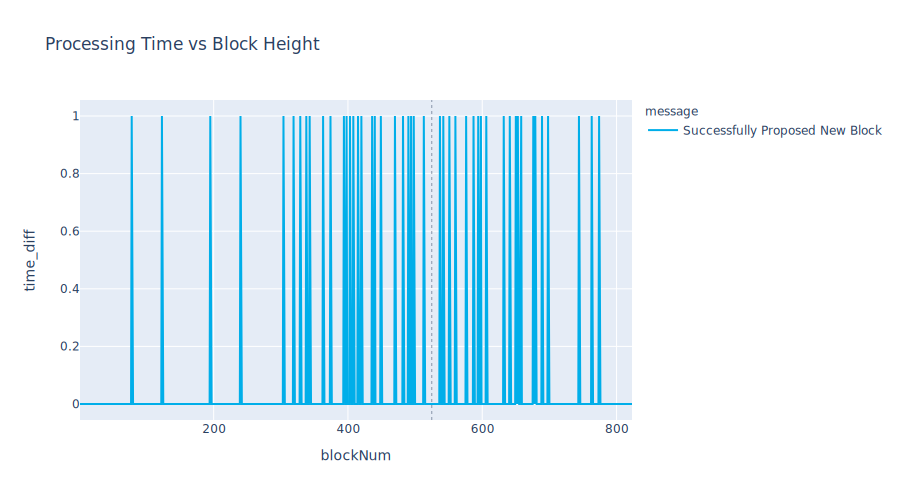

Block 2
png graphs saved in ../../graphs/processing_time/OSTN_03_04/block_height/
html graphs saved in https://harmony-one.github.io/harmony-log-analysis/graphs/processing_time/OSTN_03_04/block_height/1_processing_time_vs_block_height.html


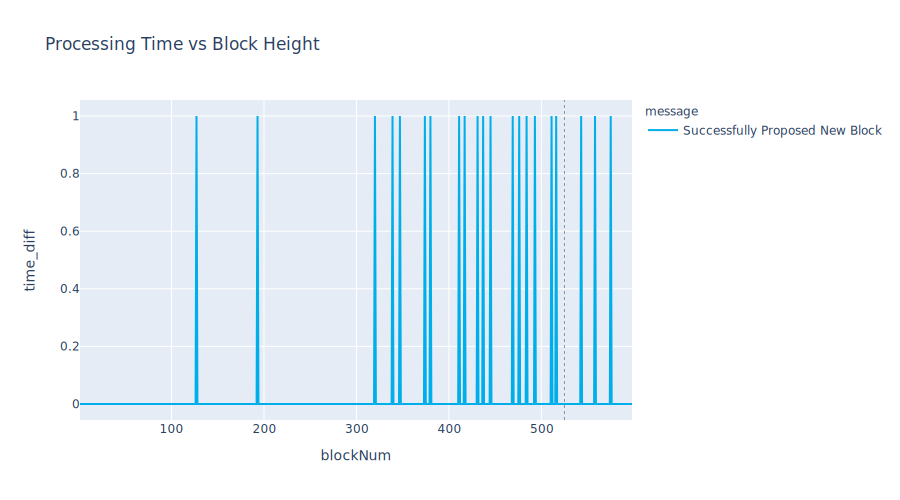

Block 3
png graphs saved in ../../graphs/processing_time/OSTN_03_04/block_height/
html graphs saved in https://harmony-one.github.io/harmony-log-analysis/graphs/processing_time/OSTN_03_04/block_height/2_processing_time_vs_block_height.html


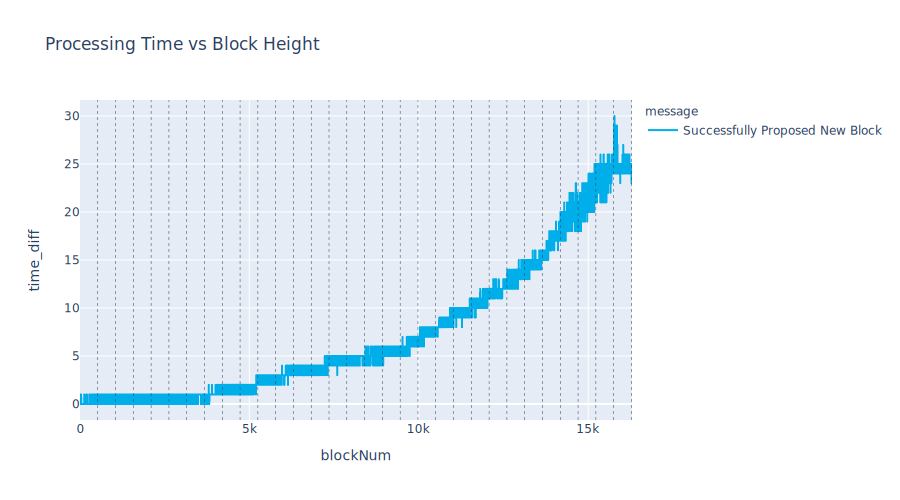

Block 4
png graphs saved in ../../graphs/processing_time/OSTN_03_04/block_height/
html graphs saved in https://harmony-one.github.io/harmony-log-analysis/graphs/processing_time/OSTN_03_04/block_height/3_processing_time_vs_block_height.html


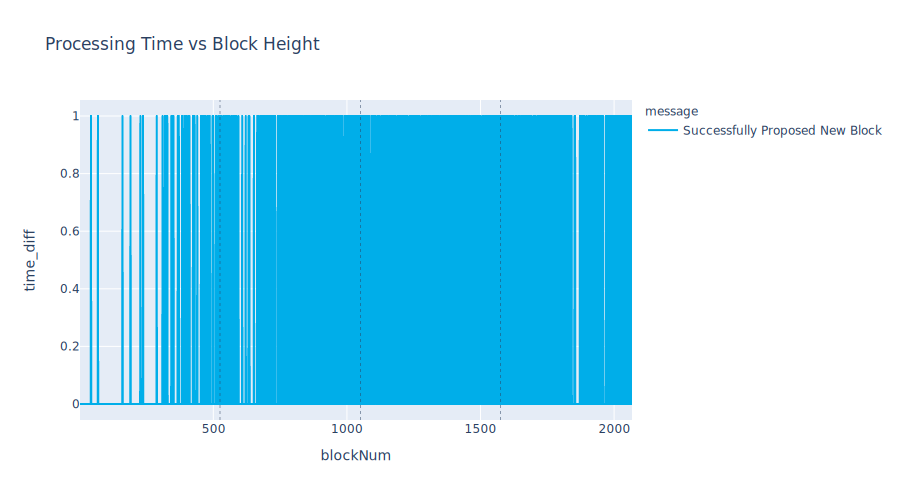

Block 5
png graphs saved in ../../graphs/processing_time/OSTN_03_04/block_height/
html graphs saved in https://harmony-one.github.io/harmony-log-analysis/graphs/processing_time/OSTN_03_04/block_height/4_processing_time_vs_block_height.html


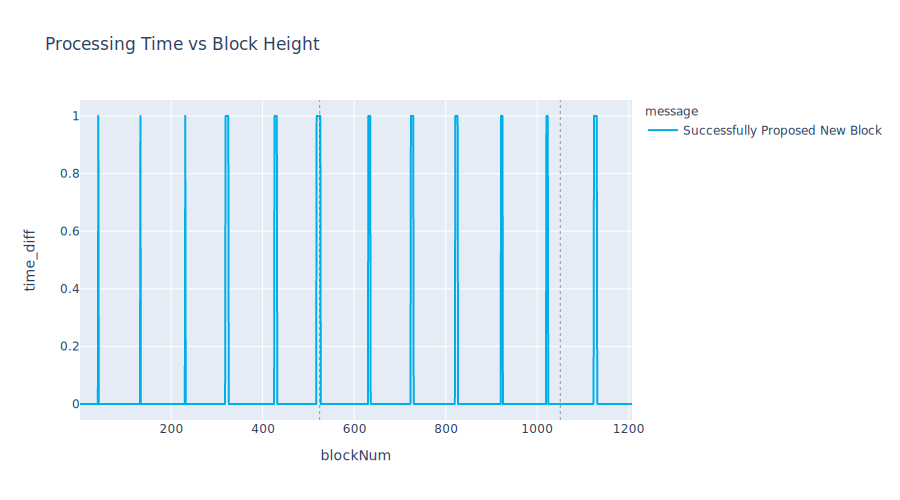

Block 6
png graphs saved in ../../graphs/processing_time/OSTN_03_04/block_height/
html graphs saved in https://harmony-one.github.io/harmony-log-analysis/graphs/processing_time/OSTN_03_04/block_height/5_processing_time_vs_block_height.html


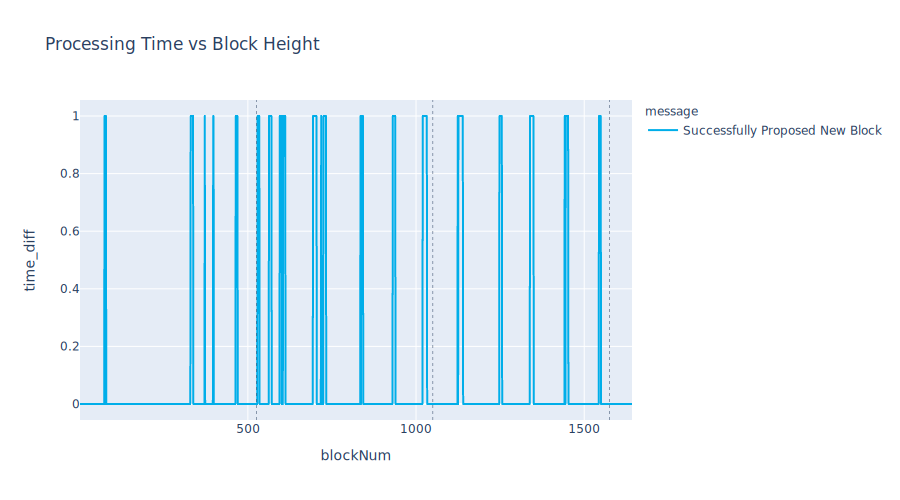

Block 7
png graphs saved in ../../graphs/processing_time/OSTN_03_04/block_height/
html graphs saved in https://harmony-one.github.io/harmony-log-analysis/graphs/processing_time/OSTN_03_04/block_height/6_processing_time_vs_block_height.html


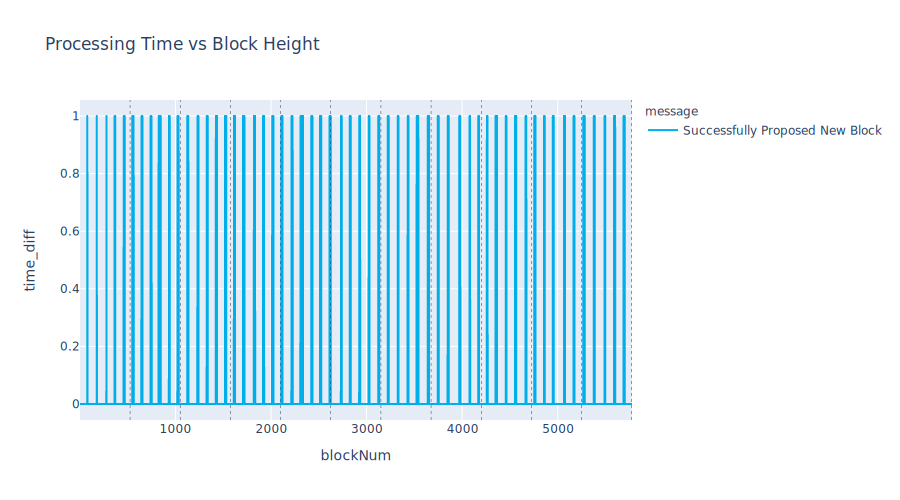

Block 8
png graphs saved in ../../graphs/processing_time/OSTN_03_04/block_height/
html graphs saved in https://harmony-one.github.io/harmony-log-analysis/graphs/processing_time/OSTN_03_04/block_height/7_processing_time_vs_block_height.html


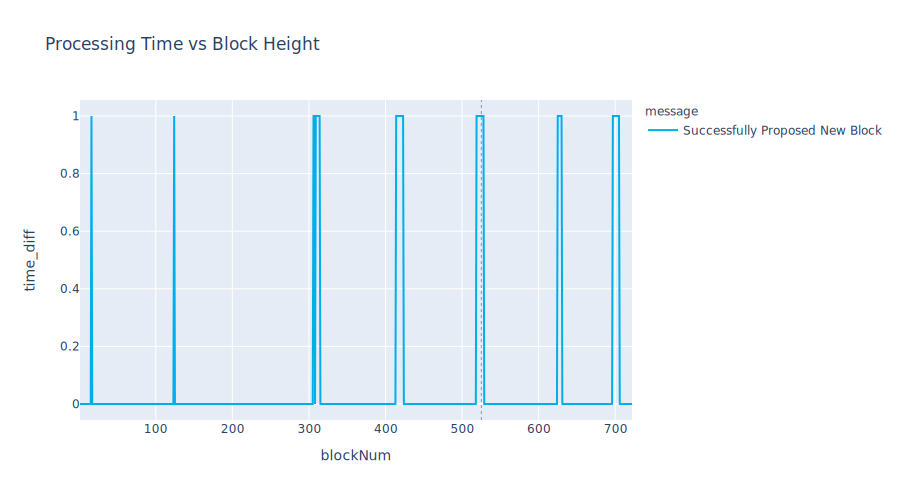

Block 9
png graphs saved in ../../graphs/processing_time/OSTN_03_04/block_height/
html graphs saved in https://harmony-one.github.io/harmony-log-analysis/graphs/processing_time/OSTN_03_04/block_height/8_processing_time_vs_block_height.html


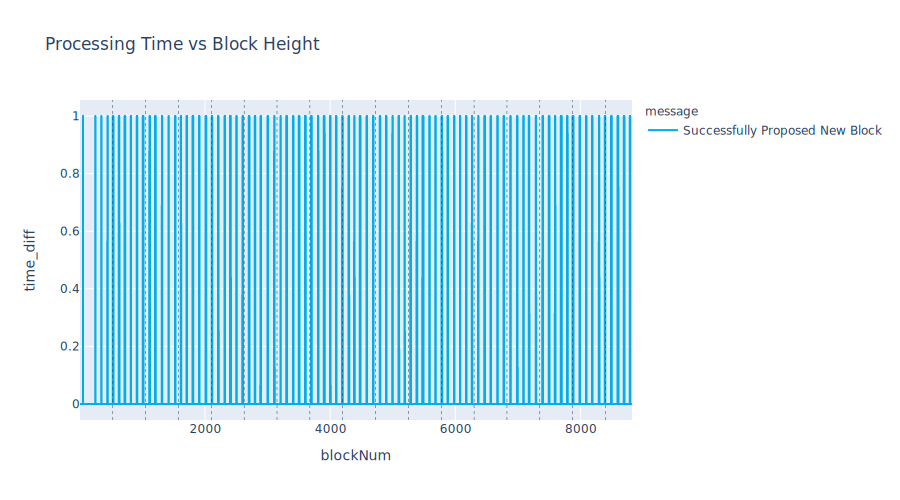

In [7]:
for idx in range(len(index)-1):
    
    print("Block "+str(idx+1))
    new = df.loc[index[idx]:index[idx+1]-1]
    new = new.drop_duplicates(subset = ['blockNum', 'message'], keep = "last")
    new['time_diff'] = new.groupby(['blockNum'])['time'].apply(lambda c: c.diff().dt.seconds)
    new.dropna(inplace = True)
    new.reset_index(inplace = True, drop = True) 
    draw_graph(new, idx)     